This is the  following of the work done in the videos, the final and overall work is scene in 01-ExploringTheAutomobileMpgDataset.ipynb

In [2]:
# imports
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
automobile_df = pd.read_csv('datasets/auto-mpg.csv')

automobile_df.sample(5)       # 5 records chosen at random from our dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
103,11.0,8,400.0,150,4997,14.0,73,1,chevrolet impala
179,22.0,4,121.0,98,2945,14.5,75,2,volvo 244dl
240,30.5,4,97.0,78,2190,14.1,77,2,volkswagen dasher
220,33.5,4,85.0,70,1945,16.8,77,3,datsun f-10 hatchback
242,21.5,4,121.0,110,2600,12.8,77,2,bmw 320i


In [4]:
automobile_df.shape

(398, 9)

In [6]:
# preprocessing
automobile_df = automobile_df.replace('?', np.nan) # question marks indicate missing fields, and replace thes with NANS

In [7]:
#drop records which have any fields missing
automobile_df = automobile_df.dropna()

In [8]:
automobile_df.shape

(392, 9)

In [9]:
# since the name of the car and the origin of the car has no impact on its mileage, lets drop those columns as well
automobile_df.drop(['origin', 'car name'], axis = 1, inplace=True)

In [10]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
63,14.0,8,400.0,175,4385,12.0,72
357,32.9,4,119.0,100,2615,14.8,81
146,28.0,4,90.0,75,2125,14.5,74
322,46.6,4,86.0,65,2110,17.9,80
204,32.0,4,85.0,70,1990,17.0,76


In [11]:
# convert the year to its fill form
automobile_df['model year'] = '19' + automobile_df['model year'].astype(str)

In [12]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
173,24.0,4,119.0,97,2545,17.0,1975
162,15.0,6,258.0,110,3730,19.0,1975
269,30.9,4,105.0,75,2230,14.5,1978
335,35.0,4,122.0,88,2500,15.1,1980
311,32.1,4,98.0,70,2120,15.5,1980


In [13]:
# calculate the age of the car, current year- model year
automobile_df['age'] = datetime.datetime.now().year - pd.to_numeric(automobile_df['model year'])

In [14]:
#remove model year
automobile_df.drop(['model year'], axis=1, inplace=True)

In [16]:
#look at object types
automobile_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

In [15]:
automobile_df.sample(5)


,mpg,cylinders,displacement,horsepower,weight,acceleration,age
391,36.0,4,135.0,84,2370,13.0,38
110,22.0,4,108.0,94,2379,16.5,47
189,15.5,8,304.0,120,3962,13.9,44
19,26.0,4,97.0,46,1835,20.5,50
41,14.0,8,318.0,150,4096,13.0,49


In [17]:
#convert horsepower to numeric
automobile_df['horsepower'] = pd.to_numeric(automobile_df['horsepower'], errors='coerce')

In [18]:
automobile_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,44.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,38.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,41.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,44.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,47.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,50.000000


Text(0, 0.5, 'Miles per gallon')

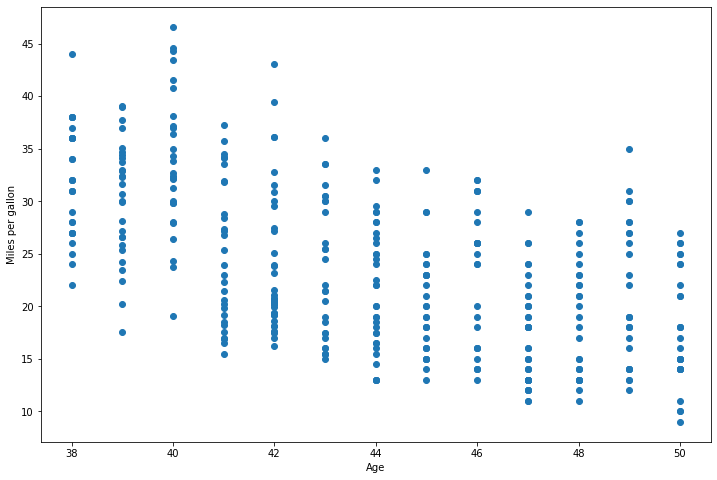

In [19]:

#age vs mileage
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['age'], automobile_df['mpg'])

plt.xlabel('Age')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

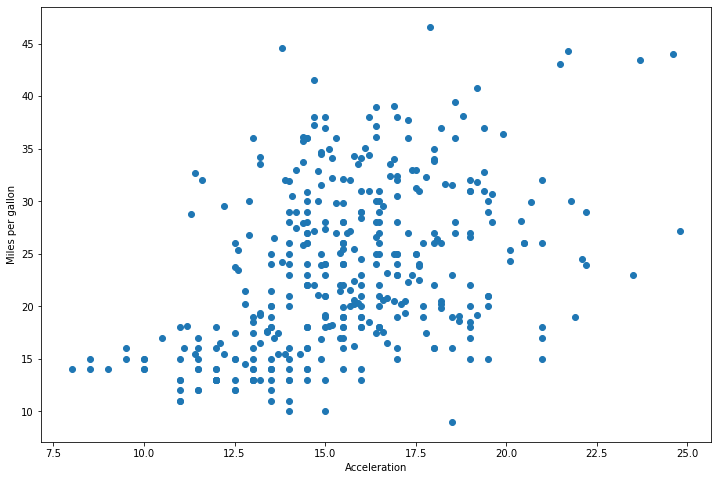

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['acceleration'], automobile_df['mpg'])

plt.xlabel('Acceleration')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

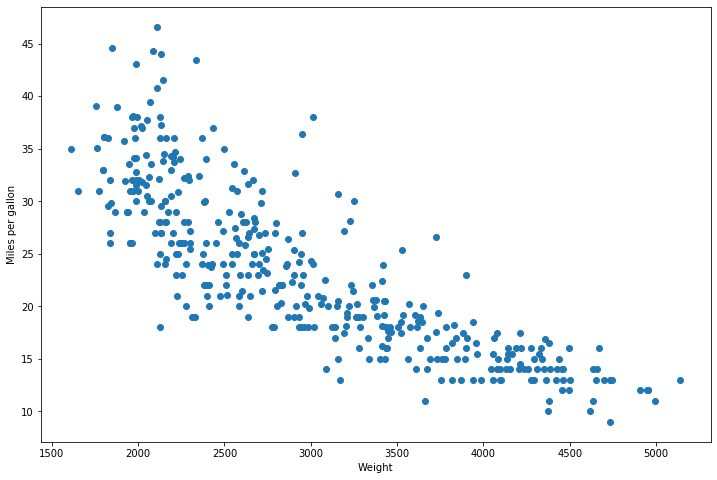

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['weight'], automobile_df['mpg'])

plt.xlabel('Weight')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

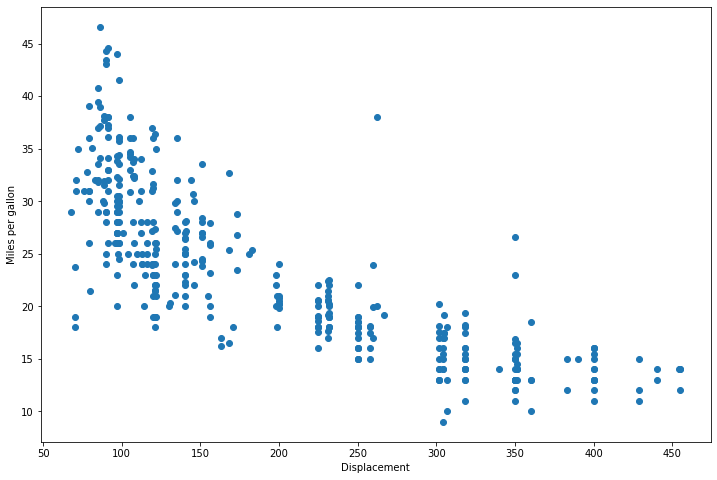

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['displacement'], automobile_df['mpg'])

plt.xlabel('Displacement')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

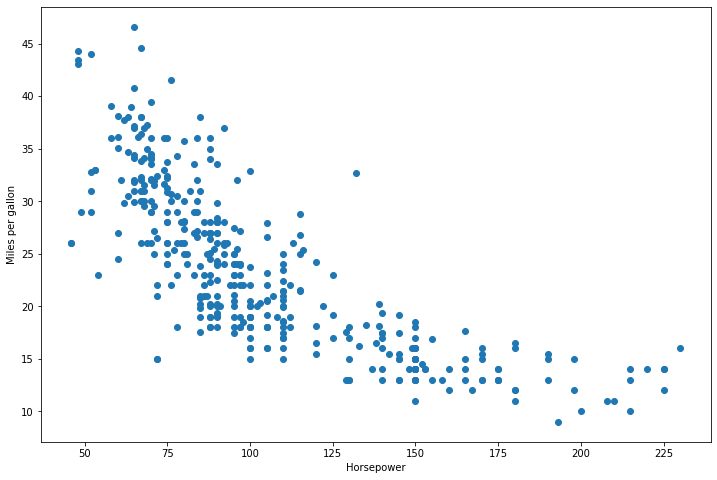

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['horsepower'], automobile_df['mpg'])

plt.xlabel('Horsepower')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

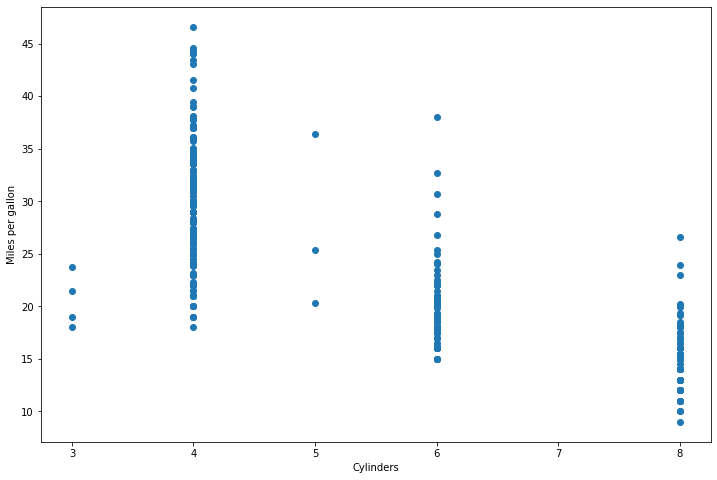

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['cylinders'], automobile_df['mpg'])

plt.xlabel('Cylinders')
plt.ylabel('Miles per gallon')

In [25]:
#do some correlations, checking every correlation between each variable
automobile_corr = automobile_df.corr()

automobile_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


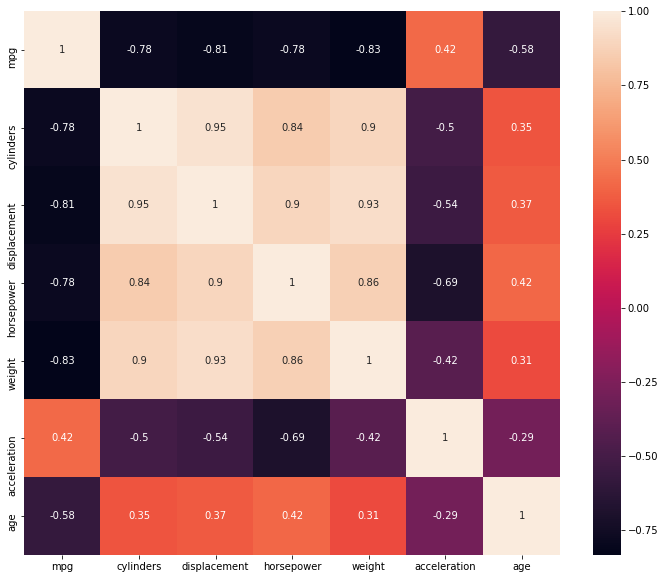

In [26]:

# looking at correlation visually
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(automobile_corr, annot=True)

In [27]:
automobile_df = automobile_df.sample(frac=1).reset_index(drop=True) #shuffeling data, so that the ml does not pick up on any patterns that might exist.

automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,15.0,8,304.0,150,3892,12.5,48
1,19.2,6,231.0,105,3535,19.2,42
2,26.0,4,96.0,69,2189,18.0,48
3,26.0,4,79.0,67,1963,15.5,46
4,29.0,4,97.0,75,2171,16.0,45


In [28]:
automobile_df.to_csv('datasets/auto-mpg-processed.csv', index=False)

In [29]:
!ls datasets

auto-mpg-processed.csv auto-mpg.csv           exams.csv
